In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv('bostonbin.csv')

x = data.iloc[:, :-1]  # Atributos
y = data.iloc[:, -1]   # Saída

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Melhor valor de C: 32
Melhor valor de gamma: 3.0517578125e-05
Acurácia do modelo SVM: 0.868421052631579
Relatório de Classificação do modelo SVM:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        69
         1.0       0.87      0.89      0.88        83

    accuracy                           0.87       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152



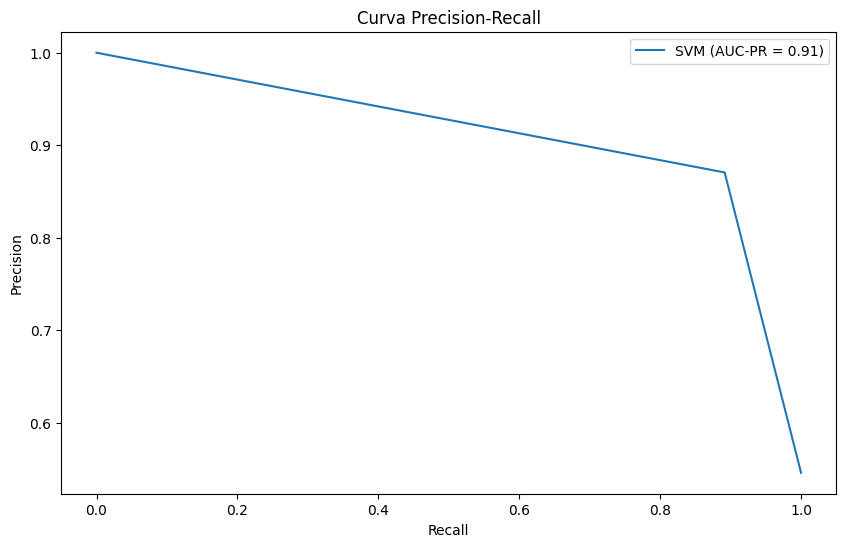

In [24]:
#Abordagem svm
param_grid_svm = {
    'C': [2**i for i in range(-5, 16, 2)],  # Valores de C
    'gamma': [2**i for i in range(-15, 4, 2)]  # Valores de gamma
}

# Crie o modelo SVM com kernel RBF
svm_model = SVC(kernel='rbf')

# Realize a busca em grade com validação cruzada em 10 folds para SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=kf, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)

# Obtenha os melhores hiperparâmetros do modelo SVM
best_C_svm = grid_search_svm.best_params_['C']
best_gamma_svm = grid_search_svm.best_params_['gamma']

# Treine o modelo SVM com os melhores hiperparâmetros
best_svm_model = SVC(kernel='rbf', C=best_C_svm, gamma=best_gamma_svm)
best_svm_model.fit(x_train, y_train)

# Faça previsões nos dados de teste
svm_predictions = best_svm_model.predict(x_test)

# Calcule as curvas Precision-Recall para SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_predictions)

# Calcule a área sob a curva Precision-Recall (AUC-PR) para SVM
auc_svm = auc(recall_svm, precision_svm)

# Avalie o desempenho do modelo SVM 
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print(f'Melhor valor de C: {best_C_svm}')
print(f'Melhor valor de gamma: {best_gamma_svm}')
print(f'Acurácia do modelo SVM: {svm_accuracy}')
print(f'Relatório de Classificação do modelo SVM:\n{svm_report}')

plt.figure(figsize=(10, 6))
plt.plot(recall_svm, precision_svm, label=f'SVM (AUC-PR = {auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

Melhor altura máxima da árvore: 8
Melhor número mínimo de amostras em um nó folha: 4
Acurácia do modelo da árvore de decisão: 0.861842
Relatório de Classificação do modelo da árvore de decisão:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        69
         1.0       0.92      0.82      0.87        83

    accuracy                           0.86       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.87      0.86      0.86       152



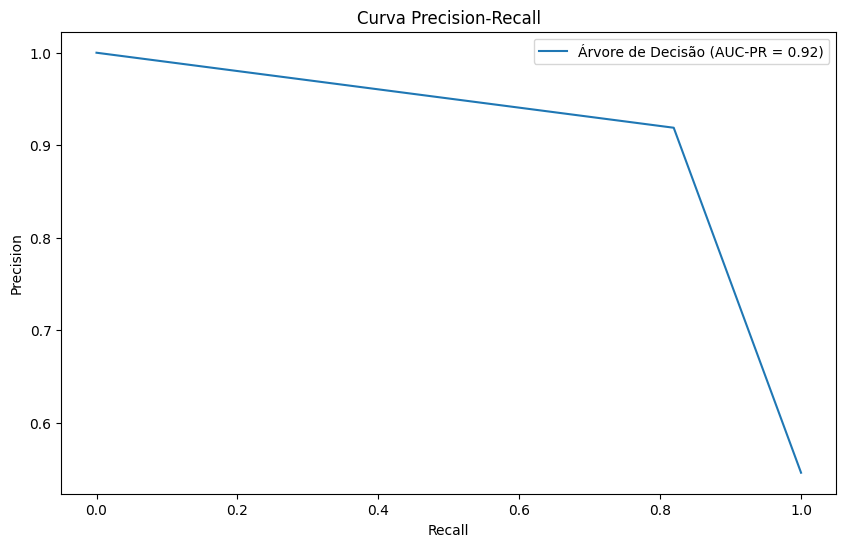

In [22]:
#Abordagem Decision Tree
param_grid_tree = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Altura máxima da árvore
    'min_samples_leaf': [1, 2, 3, 4, 5],  # Número mínimo de amostras em um nó folha
    'criterion': ['gini']  # Critério de divisão da árvore (índice de Gini)
}

tree_model = DecisionTreeClassifier(criterion='gini')

# Realize a busca em grade com validação cruzada em 10 folds para Árvore de Decisão
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=kf, n_jobs=-1, scoring='accuracy')
grid_search_tree.fit(x_train, y_train)

# Obtenha os melhores hiperparâmetros do modelo de Árvore de Decisão
best_max_depth_tree = grid_search_tree.best_params_['max_depth']
best_min_samples_leaf_tree = grid_search_tree.best_params_['min_samples_leaf']

# Treine o modelo de Árvore de Decisão com os melhores hiperparâmetros
best_tree_model = DecisionTreeClassifier(max_depth=best_max_depth_tree, min_samples_leaf=best_min_samples_leaf_tree, criterion='gini')
best_tree_model.fit(x_train, y_train)

# Faça previsões nos dados de teste
tree_predictions = best_tree_model.predict(x_test)

# Calcule as curvas Precision-Recall para Árvore de Decisão
precision_tree, recall_tree, _ = precision_recall_curve(y_test, tree_predictions)

# Calcule a área sob a curva Precision-Recall (AUC-PR) para Árvore de Decisão
auc_tree = auc(recall_tree, precision_tree)

# Faça previsões com o modelo da árvore de decisão
tree_predictions = best_tree_model.predict(x_test)

# Avalie o desempenho do modelo da árvore de decisão
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_report = classification_report(y_test, tree_predictions)

#]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]


print(f'Melhor altura máxima da árvore: {best_max_depth_tree}')
print(f'Melhor número mínimo de amostras em um nó folha: {best_min_samples_leaf_tree}')
print(f'Acurácia do modelo da árvore de decisão: {tree_accuracy:2f}')
print(f'Relatório de Classificação do modelo da árvore de decisão:\n{tree_report}')

# Exiba as curvas Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_tree, precision_tree, label=f'Árvore de Decisão (AUC-PR = {auc_tree:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()